### **Importing required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1.Data Loading and Initial Exploration**



1.   Load the dataset using pandas and examine its structure.

2.   Check data types, unique values, and statistical summaries for each column.

3.   Review columns that typically have missing data (e.g., weight, payer_code, medical_specialty).








In [ ]:
df =pd.read_csv("/content/drive/MyDrive/FDM_ADVA/diabetic_data.csv")

In [ ]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


**checking for duplicate  values**

In [ ]:
print(df.duplicated().any().sum())


0


**Check data types**


In [ ]:
unique_dtypev={}
for col in df.columns:
  unique_dtypev[col]=df[col].dtype
  print(f"{col}: {df[col].dtype}\n")

encounter_id: int64

patient_nbr: int64

race: object

gender: object

age: object

weight: object

admission_type_id: int64

discharge_disposition_id: int64

admission_source_id: int64

time_in_hospital: int64

payer_code: object

medical_specialty: object

num_lab_procedures: int64

num_procedures: int64

num_medications: int64

number_outpatient: int64

number_emergency: int64

number_inpatient: int64

diag_1: object

diag_2: object

diag_3: object

number_diagnoses: int64

max_glu_serum: object

A1Cresult: object

metformin: object

repaglinide: object

nateglinide: object

chlorpropamide: object

glimepiride: object

acetohexamide: object

glipizide: object

glyburide: object

tolbutamide: object

pioglitazone: object

rosiglitazone: object

acarbose: object

miglitol: object

troglitazone: object

tolazamide: object

examide: object

citoglipton: object

insulin: object

glyburide-metformin: object

glipizide-metformin: object

glimepiride-pioglitazone: object

metformin-rosiglit

**Check Unique values of each coulmns**

In [ ]:
unique_values = {}

for col in df.columns:
    unique_values[col] = df[col].unique()

# Print results
for col, values in unique_values.items():
    print(f"\nColumn: {col}")
    print(values)


Column: encounter_id
[  2278392    149190     64410 ... 443854148 443857166 443867222]

Column: patient_nbr
[  8222157  55629189  86047875 ... 140199494 120975314 175429310]

Column: race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

Column: gender
['Female' 'Male' 'Unknown/Invalid']

Column: age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

Column: weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

Column: admission_type_id
[6 1 2 3 4 5 8 7]

Column: discharge_disposition_id
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]

Column: admission_source_id
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]

Column: time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]

Column: payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']

Column: medical_specialty
['Pediatric

**checking for null values**

In [ ]:
print(f"Null value in dataset:\n\n{df.isnull().sum()}")

Null value in dataset:

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride             

replacing all the **"?"** with NaN

In [ ]:
df.replace("?",np.nan,inplace=True)


Null values after replacing **"?"**

In [ ]:
print(f"Null value in dataset:\n\n{df.isnull().sum()}")

Null value in dataset:

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride             

statistical summaries for each column

In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Review columns that typically have missing data (e.g., weight, payer_code, medical_specialty).

In [ ]:

null_counts = df.isnull().sum()


null_columns = null_counts[null_counts > 0]


null_columns_desc = null_columns.sort_values(ascending=False)

total_rows = len(df)
null_percentages = (null_counts / total_rows) * 100

missing_info = pd.DataFrame({
    'Missing Count': null_counts,
    'Missing Percentage': null_percentages
})

missing_info = missing_info[missing_info['Missing Count'] > 0]
missing_info_sorted = missing_info.sort_values(
    by='Missing Percentage',
    ascending=False
)

print(missing_info_sorted)

                   Missing Count  Missing Percentage
weight                     98569           96.858479
max_glu_serum              96420           94.746772
A1Cresult                  84748           83.277322
medical_specialty          49949           49.082208
payer_code                 40256           39.557416
race                        2273            2.233555
diag_3                      1423            1.398306
diag_2                       358            0.351787
diag_1                        21            0.020636


Handling the inconsistency of **"age"** and **"weight"**

In [ ]:
def convert_range(x):
    if isinstance(x, float) and np.isnan(x):
        return np.nan

    if x.startswith(">"):
        val = int(x.replace(">", ""))
        return val

    low = int(x.split('-')[0].replace('[',''))
    high = int(x.split('-')[1].replace(')',''))
    return (low + high) / 2

df['age_numeric'] = df['age'].apply(convert_range)
df['weight_num'] = df["weight"].apply(convert_range)


In [ ]:
df.drop(columns=['age', 'weight','max_glu_serum','patient_nbr','encounter_id'], inplace=True)
df.rename(columns={'age_numeric':'age', 'weight_num':'weight'}, inplace=True)

# Assign the modified df to df1.
df1 = df.copy()

In [ ]:
df1

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age,weight
0,Caucasian,Female,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,NO,5.0,NaN
1,Caucasian,Female,1,1,7,3,NaN,NaN,59,0,...,No,No,No,No,No,Ch,Yes,>30,15.0,NaN
2,AfricanAmerican,Female,1,1,7,2,NaN,NaN,11,5,...,No,No,No,No,No,No,Yes,NO,25.0,NaN
3,Caucasian,Male,1,1,7,2,NaN,NaN,44,1,...,No,No,No,No,No,Ch,Yes,NO,35.0,NaN
4,Caucasian,Male,1,1,7,1,NaN,NaN,51,0,...,No,No,No,No,No,Ch,Yes,NO,45.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,1,3,7,3,MC,NaN,51,0,...,No,No,No,No,No,Ch,Yes,>30,75.0,NaN
101762,AfricanAmerican,Female,1,4,5,5,MC,NaN,33,3,...,No,No,No,No,No,No,Yes,NO,85.0,NaN
101763,Caucasian,Male,1,1,7,1,MC,NaN,53,0,...,No,No,No,No,No,Ch,Yes,NO,75.0,NaN
101764,Caucasian,Female,2,3,7,10,MC,Surgery-General,45,2,...,No,No,No,No,No,Ch,Yes,NO,85.0,NaN


In [ ]:
df1.drop(['weight'],axis=1,inplace=True)

In [ ]:
df1

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age
0,Caucasian,Female,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,NO,5.0
1,Caucasian,Female,1,1,7,3,NaN,NaN,59,0,...,Up,No,No,No,No,No,Ch,Yes,>30,15.0
2,AfricanAmerican,Female,1,1,7,2,NaN,NaN,11,5,...,No,No,No,No,No,No,No,Yes,NO,25.0
3,Caucasian,Male,1,1,7,2,NaN,NaN,44,1,...,Up,No,No,No,No,No,Ch,Yes,NO,35.0
4,Caucasian,Male,1,1,7,1,NaN,NaN,51,0,...,Steady,No,No,No,No,No,Ch,Yes,NO,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,1,3,7,3,MC,NaN,51,0,...,Down,No,No,No,No,No,Ch,Yes,>30,75.0
101762,AfricanAmerican,Female,1,4,5,5,MC,NaN,33,3,...,Steady,No,No,No,No,No,No,Yes,NO,85.0
101763,Caucasian,Male,1,1,7,1,MC,NaN,53,0,...,Down,No,No,No,No,No,Ch,Yes,NO,75.0
101764,Caucasian,Female,2,3,7,10,MC,Surgery-General,45,2,...,Up,No,No,No,No,No,Ch,Yes,NO,85.0


# **2.Missing Data Handling**



1.   Visualize the pattern and extent of missingness using heatmaps or bar charts.

2.   Use domain knowledge to decide appropriate imputation strategies:
   
     *   Continuous features: median or mean imputation.

     *   Categorical features: mode imputation or a new category such as "Unknown."


3.   Consider dropping columns or rows if missingness is very high and imputation is not meaningful.





In [ ]:
import plotly.express as px
import pandas as pd # Ensure pandas is imported

if not missing_info.empty:
    total_rows = len(df)

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        'Column Name': missing_info.index,
        'Missing Count': missing_info['Missing Count'],
        'Missing Percentage': missing_info['Missing Percentage']
    }).sort_values(by='Missing Percentage', ascending=False)

    # 2. Generate interactive Plotly bar chart
    fig = px.bar(
        plot_df,
        x='Column Name',
        y='Missing Percentage',
        title='Percentage of Missing Values per Column',
        hover_data=['Missing Count'], # Show count on hover
        labels={'Column Name': 'Dataset Columns', 'Missing Percentage': 'Percentage Missing (%)'},
        color='Missing Percentage', # Optional: color the bars by percentage
        template='plotly_white'
    )

    fig.show()
else:
    print("No missing values found to plot.")

**Categorical features: mode imputation or a new category such as "Unknown."**

In [ ]:
col =["medical_specialty","payer_code"]
df1[col]=df[col].fillna("unknown")

**Continuous features: median or mean imputation**

In [ ]:
cols = ['race', 'gender', 'A1Cresult',
        'diag_1', 'diag_2', 'diag_3']

for col in cols:
    df1[col] = df1[col].fillna(df[col].mode()[0])


**checking for NUll values**

In [ ]:
df1.isnull().sum()

,0
race,0
gender,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
payer_code,0
medical_specialty,0
num_lab_procedures,0
num_procedures,0


In [ ]:
readmitted_map_c = {'NO': 0, '<30': 1, '>30': 1}
df1["readmitted_bi"] = df1["readmitted"].map(readmitted_map_c)

In [ ]:
# df1.drop(columns=['readmitted'],axis=1,inplace=True)

In [ ]:
df1

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age,readmitted_bi
0,Caucasian,Female,6,25,1,1,unknown,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,NO,5.0,0
1,Caucasian,Female,1,1,7,3,unknown,unknown,59,0,...,No,No,No,No,No,Ch,Yes,>30,15.0,1
2,AfricanAmerican,Female,1,1,7,2,unknown,unknown,11,5,...,No,No,No,No,No,No,Yes,NO,25.0,0
3,Caucasian,Male,1,1,7,2,unknown,unknown,44,1,...,No,No,No,No,No,Ch,Yes,NO,35.0,0
4,Caucasian,Male,1,1,7,1,unknown,unknown,51,0,...,No,No,No,No,No,Ch,Yes,NO,45.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,1,3,7,3,MC,unknown,51,0,...,No,No,No,No,No,Ch,Yes,>30,75.0,1
101762,AfricanAmerican,Female,1,4,5,5,MC,unknown,33,3,...,No,No,No,No,No,No,Yes,NO,85.0,0
101763,Caucasian,Male,1,1,7,1,MC,unknown,53,0,...,No,No,No,No,No,Ch,Yes,NO,75.0,0
101764,Caucasian,Female,2,3,7,10,MC,Surgery-General,45,2,...,No,No,No,No,No,Ch,Yes,NO,85.0,0


In [ ]:
# df1.select_dtypes(include=['object', 'category']).columns


## **CatBoost Initial**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
xc=df1.drop(columns=['readmitted_bi','readmitted'])
yc=df1['readmitted_bi']

xc_train,xc_test,yc_train,yc_test=train_test_split(xc,yc,test_size=0.25,random_state=42)

In [ ]:
# pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# 1. Identify which columns are categorical
# Based on your file, these are the ones ending in _id, _map, or _l
cat_features_indices1 = [
    'race', 'gender', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

# 2. Initialize the model
modelcb = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    verbose=100,  # Log every 100 trees,
    class_weights=[0.92743876, 1.08487911]
)

# 3. Train (Notice we pass the 'cat_features' argument!)
modelcb.fit(
    xc_train, yc_train,
    cat_features=cat_features_indices1,  # <--- THIS IS THE SECRET SAUCE
    eval_set=(xc_test, yc_test),
    early_stopping_rounds=50
)

# 4. Evaluate

0:	learn: 0.6882094	test: 0.6882147	best: 0.6882147 (0)	total: 777ms	remaining: 12m 56s
100:	learn: 0.6253873	test: 0.6268022	best: 0.6268022 (100)	total: 1m 13s	remaining: 10m 56s
200:	learn: 0.6173565	test: 0.6214076	best: 0.6214076 (200)	total: 1m 59s	remaining: 7m 53s
300:	learn: 0.6113221	test: 0.6186292	best: 0.6186292 (300)	total: 2m 44s	remaining: 6m 21s
400:	learn: 0.6072711	test: 0.6173645	best: 0.6173645 (400)	total: 3m 31s	remaining: 5m 16s
500:	learn: 0.6041049	test: 0.6166404	best: 0.6166404 (500)	total: 4m 18s	remaining: 4m 17s
600:	learn: 0.6011060	test: 0.6159430	best: 0.6159430 (600)	total: 5m 4s	remaining: 3m 21s
700:	learn: 0.5986601	test: 0.6156166	best: 0.6156166 (700)	total: 5m 50s	remaining: 2m 29s
800:	learn: 0.5963453	test: 0.6154930	best: 0.6154630 (766)	total: 6m 35s	remaining: 1m 38s
900:	learn: 0.5941603	test: 0.6152120	best: 0.6152116 (899)	total: 7m 22s	remaining: 48.6s
999:	learn: 0.5921284	test: 0.6149868	best: 0.6149868 (999)	total: 8m 8s	remaining: 0

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

preds = modelcb.predict(xc_test)
print(f"Accuracy: {accuracy_score(yc_test, preds)}")
print(f"precision: {precision_score(yc_test, preds)}")
print(f"recall: {recall_score(yc_test, preds)}")
print(f"f1: {f1_score(yc_test, preds)}")
print(f"confusion matrix: \n{confusion_matrix(yc_test, preds)}")

Accuracy: 0.6536042763933653
precision: 0.6181978233034571
recall: 0.6564969830882977
f1: 0.636772039731278
confusion matrix: 
[[8904 4771]
 [4042 7725]]


In [ ]:
df1.drop(['readmitted_bi'],axis=1,inplace=True)

# **3.Encoding Categorical Variables**

* Convert categorical fields (race, gender, admission_type_id, discharge_disposition_id, medical_specialty, medications) into numeric formats using label encoding or one-hot encoding.


In [ ]:
categorical_cols = df1.select_dtypes(include=['object', 'category']).columns
print(  categorical_cols)
print(len(categorical_cols))

Index(['race', 'gender', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
34


In [ ]:
target = {'No', 'Steady', 'Up', 'Down'}

matched_cols = [
    col for col in df1.columns
    if set(df1[col].dropna().unique()) == target
]

matched_cols


['metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'insulin',
 'glyburide-metformin']

In [ ]:
target = {'No', 'Steady'}

matched_cols = [
    col for col in df1.columns
    if set(df1[col].dropna().unique()) == target
]

matched_cols


['acetohexamide',
 'tolbutamide',
 'troglitazone',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

In [ ]:
target = {'No'}

matched_cols = [
    col for col in df1.columns
    if set(df1[col].dropna().unique()) == target
]

matched_cols


['examide', 'citoglipton']

In [ ]:
target = {'No','Ch'}

matched_cols = [
    col for col in df1.columns
    if set(df1[col].dropna().unique()) == target
]

matched_cols


['change']

In [ ]:
target = {'No','Yes'}

matched_cols = [
    col for col in df1.columns
    if set(df1[col].dropna().unique()) == target
]

matched_cols


['diabetesMed']

In [ ]:
readmitted_map = {'NO': 0, '<30': 1, '>30': 1}
df1["readmitted_binary"] = df1["readmitted"].map(readmitted_map)

change_map={'Ch':1,'No':0}
df1['change_bi']=df1['change'].map(change_map)

diabetesMed_map={'Yes':1,'No':0}
df1['diabetesMed_bi']=df1['diabetesMed'].map(diabetesMed_map)



In [ ]:
mul={'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
df1['metformin_map'] = df1['metformin'].map(mul)

df1['repaglinide_map'] = df1['repaglinide'].map(mul)

df1['nateglinide_map'] = df1['nateglinide'].map(mul)

df1['chlorpropamide_map'] = df1['chlorpropamide'].map(mul)

df1['glimepiride_map'] = df1['glimepiride'].map(mul)

df1['glipizide_map'] = df1['glipizide'].map(mul)

df1['glyburide_map'] = df1['glyburide'].map(mul)

df1['pioglitazone_map'] = df1['pioglitazone'].map(mul)

df1['rosiglitazone_map'] = df1['rosiglitazone'].map(mul)

df1['acarbose_map'] = df1['acarbose'].map(mul)

df1['miglitol_map'] = df1['miglitol'].map(mul)

df1['insulin_map'] = df1['insulin'].map(mul)

df1['glyburide-metformin_map'] = df1['glyburide-metformin'].map(mul)


In [ ]:
mul1 = {'No':0, 'Steady':1}
df1['acetohexamide_map'] = df1['acetohexamide'].map(mul1)

df1['tolbutamide_map'] = df1['tolbutamide'].map(mul1)

df1['troglitazone_map'] = df1['troglitazone'].map(mul1)

df1['glipizide-metformin_map'] = df1['glipizide-metformin'].map(mul1)

df1['glimepiride-pioglitazone_map'] = df1['glimepiride-pioglitazone'].map(mul1)

df1['metformin-rosiglitazone_map'] = df1['metformin-rosiglitazone'].map(mul1)

df1['metformin-pioglitazone_map'] = df1['metformin-pioglitazone'].map(mul1)


In [ ]:
mul2 ={'No':0}
df1['examide_map'] = df1['examide'].map(mul2)
df1['citoglipton_map'] = df1['citoglipton'].map(mul2)


In [ ]:
tolazamide_m={'No':0,'Up':1,'Steady':2}
df1['tolazamide_map'] = df1['tolazamide'].map(tolazamide_m)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_a1c=LabelEncoder()
le_race = LabelEncoder()
le_gender = LabelEncoder()
le_payer = LabelEncoder()


df1['A1Cresult_m']=le_a1c.fit_transform(df1['A1Cresult'])
df1['race_l'] = le_race.fit_transform(df1['race'])
df1['gender_l'] = le_gender.fit_transform(df1['gender'])
df1['payer_code_l'] = le_payer.fit_transform(df1['payer_code'])

race_map = dict(zip(le_race.classes_, le_race.transform(le_race.classes_)))
gender_map = dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))
payer_map = dict(zip(le_payer.classes_, le_payer.transform(le_payer.classes_)))
a1c_map=dict(zip(le_a1c.classes_,le_a1c.transform(le_a1c.classes_)))

print(race_map)
print(gender_map)
print(payer_map)
print(a1c_map)


{'AfricanAmerican': np.int64(0), 'Asian': np.int64(1), 'Caucasian': np.int64(2), 'Hispanic': np.int64(3), 'Other': np.int64(4)}
{'Female': np.int64(0), 'Male': np.int64(1), 'Unknown/Invalid': np.int64(2)}
{'BC': np.int64(0), 'CH': np.int64(1), 'CM': np.int64(2), 'CP': np.int64(3), 'DM': np.int64(4), 'FR': np.int64(5), 'HM': np.int64(6), 'MC': np.int64(7), 'MD': np.int64(8), 'MP': np.int64(9), 'OG': np.int64(10), 'OT': np.int64(11), 'PO': np.int64(12), 'SI': np.int64(13), 'SP': np.int64(14), 'UN': np.int64(15), 'WC': np.int64(16), 'unknown': np.int64(17)}
{'>7': np.int64(0), '>8': np.int64(1), 'Norm': np.int64(2)}


In [ ]:
df1.drop(columns=['race','gender','A1Cresult','payer_code'],axis=1,inplace=True)

In [ ]:
df1

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,glimepiride-pioglitazone_map,metformin-rosiglitazone_map,metformin-pioglitazone_map,examide_map,citoglipton_map,tolazamide_map,A1Cresult_m,race_l,gender_l,payer_code_l
0,6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,...,0,0,0,0,0,0,1,2,0,17
1,1,1,7,3,unknown,59,0,18,0,0,...,0,0,0,0,0,0,1,2,0,17
2,1,1,7,2,unknown,11,5,13,2,0,...,0,0,0,0,0,0,1,0,0,17
3,1,1,7,2,unknown,44,1,16,0,0,...,0,0,0,0,0,0,1,2,1,17
4,1,1,7,1,unknown,51,0,8,0,0,...,0,0,0,0,0,0,1,2,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,3,7,3,unknown,51,0,16,0,0,...,0,0,0,0,0,0,1,0,1,7
101762,1,4,5,5,unknown,33,3,18,0,0,...,0,0,0,0,0,0,1,0,0,7
101763,1,1,7,1,unknown,53,0,9,1,0,...,0,0,0,0,0,0,1,2,1,7
101764,2,3,7,10,Surgery-General,45,2,21,0,0,...,0,0,0,0,0,0,1,2,0,7


In [ ]:
def categorize_icd9(code):
    if code == '?' or pd.isna(code):
        return "Unknown"

    code = str(code)

    # 1) V codes
    if code.startswith('V'):
        return "V Codes"

    # 2) E codes
    if code.startswith('E'):
        return "E Codes"

    # 3) Numeric ICD codes
    try:
        num = int(float(code))   # handles '250.83' -> 250, '8' -> 8
    except:
        return "Unknown"

    if 1 <= num <= 139:
        return "01 Infectious & Parasitic Diseases"
    elif 140 <= num <= 239:
        return "02 Neoplasms"
    elif 240 <= num <= 279:
        return "03 Endocrine/Metabolic/Immunity"
    elif 280 <= num <= 289:
        return "04 Blood Diseases"
    elif 290 <= num <= 319:
        return "05 Mental Disorders"
    elif 320 <= num <= 389:
        return "06 Nervous System"
    elif 390 <= num <= 459:
        return "07 Circulatory System"
    elif 460 <= num <= 519:
        return "08 Respiratory System"
    elif 520 <= num <= 579:
        return "09 Digestive System"
    elif 580 <= num <= 629:
        return "10 Genitourinary System"
    elif 630 <= num <= 679:
        return "11 Pregnancy/Childbirth"
    elif 680 <= num <= 709:
        return "12 Skin Disorders"
    elif 710 <= num <= 739:
        return "13 Musculoskeletal System"
    elif 740 <= num <= 759:
        return "14 Congenital Anomalies"
    elif 760 <= num <= 779:
        return "15 Perinatal Conditions"
    elif 780 <= num <= 799:
        return "16 Symptoms/Ill-defined"
    elif 800 <= num <= 999:
        return "17 Injury & Poisoning"

    return "Unknown"


In [ ]:
df1["diag_1_cat"] = df1["diag_1"].apply(categorize_icd9)
df1["diag_2_cat"] = df1["diag_2"].apply(categorize_icd9)
df1["diag_3_cat"] = df1["diag_3"].apply(categorize_icd9)


In [ ]:
le_ms=LabelEncoder()
df1['medical_specialty_l']=le_ms.fit_transform(df1['medical_specialty'])

le_d1=LabelEncoder()
df1['diag_1_cat_l']=le_d1.fit_transform(df1['diag_1_cat'])

le_d2=LabelEncoder()
df1['diag_2_cat_l']=le_d2.fit_transform(df1['diag_2_cat'])

le_d3=LabelEncoder()
df1['diag_3_cat_l']=le_d3.fit_transform(df1['diag_3_cat'])


df1.drop(columns=['medical_specialty','diag_1_cat','diag_2_cat','diag_3_cat'],axis=1,inplace=True)

In [ ]:
df1.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'age',
       'readmitted_binary', 'change_bi', 'diabetesMed_bi', 'metformin_map',
       'repaglinide_map', 'nateglinide_map', 'chlorpropamide_map',
       'glimepiride_map', 'glipizide_map', 'glyburide_map', 'pioglitazone_map',
       

In [ ]:
df1

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton_map,tolazamide_map,A1Cresult_m,race_l,gender_l,payer_code_l,medical_specialty_l,diag_1_cat_l,diag_2_cat_l,diag_3_cat_l
0,6,25,1,1,41,0,1,0,0,0,...,0,0,1,2,0,17,37,2,2,2
1,1,1,7,3,59,0,18,0,0,0,...,0,0,1,2,0,17,72,2,2,2
2,1,1,7,2,11,5,13,2,0,1,...,0,0,1,0,0,17,72,10,2,17
3,1,1,7,2,44,1,16,0,0,0,...,0,0,1,2,1,17,72,0,2,6
4,1,1,7,1,51,0,8,0,0,0,...,0,0,1,2,1,17,72,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,3,7,3,51,0,16,0,0,0,...,0,0,1,0,1,7,72,2,4,6
101762,1,4,5,5,33,3,18,0,0,1,...,0,0,1,0,0,7,72,8,2,14
101763,1,1,7,1,53,0,9,1,0,0,...,0,0,1,2,1,7,72,0,9,4
101764,2,3,7,10,45,2,21,0,0,1,...,0,0,1,2,0,7,62,15,3,15


In [ ]:
drop_cols=['diag_1','diag_2','diag_3','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'diabetesMed',
'readmitted','change' ]
df1.drop(columns=drop_cols,inplace=True)

In [ ]:
unique_dtypev={}
for col in df1.columns:
  unique_dtypev[col]=df1[col].dtype
  print(f"{col}: {df1[col].dtype}\n")

admission_type_id: int64

discharge_disposition_id: int64

admission_source_id: int64

time_in_hospital: int64

num_lab_procedures: int64

num_procedures: int64

num_medications: int64

number_outpatient: int64

number_emergency: int64

number_inpatient: int64

number_diagnoses: int64

age: float64

readmitted_binary: int64

change_bi: int64

diabetesMed_bi: int64

metformin_map: int64

repaglinide_map: int64

nateglinide_map: int64

chlorpropamide_map: int64

glimepiride_map: int64

glipizide_map: int64

glyburide_map: int64

pioglitazone_map: int64

rosiglitazone_map: int64

acarbose_map: int64

miglitol_map: int64

insulin_map: int64

glyburide-metformin_map: int64

acetohexamide_map: int64

tolbutamide_map: int64

troglitazone_map: int64

glipizide-metformin_map: int64

glimepiride-pioglitazone_map: int64

metformin-rosiglitazone_map: int64

metformin-pioglitazone_map: int64

examide_map: int64

citoglipton_map: int64

tolazamide_map: int64

A1Cresult_m: int64

race_l: int64

gende

# **4.Exploratory Data Visualization**

1.  Visualize the distribution of patient demographics (age, race, gender) using bar charts and pie charts.
2.  Plot histograms or boxplots for numeric features like time_in_hospital, num_lab_procedures, num_medications.
3.  Visualize the distribution of lab results (max_glu_serum, A1Cresult) and their relation to readmission status.
4.  Use correlation heatmaps to explore relationships between numeric features.
5.  Plot admission types, discharge outcomes, and readmission frequencies.
6.  Compare medication use patterns across different patient subgroups.


**Visualize the distribution of patient demographics (age, race, gender) using bar charts and pie charts.**

Text(0.5, 1.0, 'Gender Distribution')

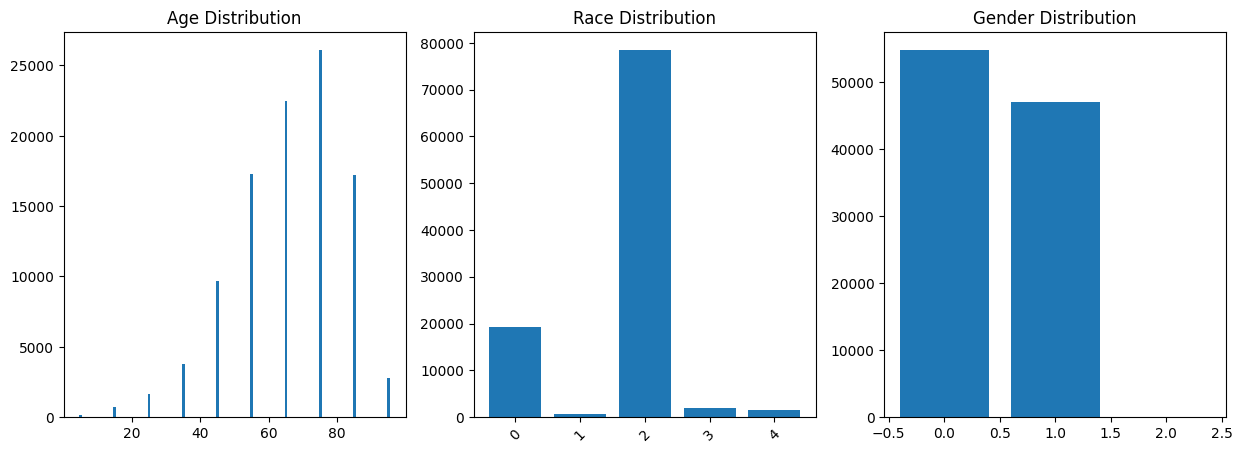

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
ax1.bar(df1['age'].value_counts().index,df1['age'].value_counts())
ax1.set_title("Age Distribution")

ax2.bar(df1['race_l'].value_counts().index,df1['race_l'].value_counts())
ax2.tick_params(axis='x', rotation=45)
ax2.set_title("Race Distribution")

ax3.bar(df1['gender_l'].value_counts().index,df1['gender_l'].value_counts())
ax3.set_title("Gender Distribution")

**Plot histograms or boxplots for numeric features like time_in_hospital, num_lab_procedures, num_medications.**

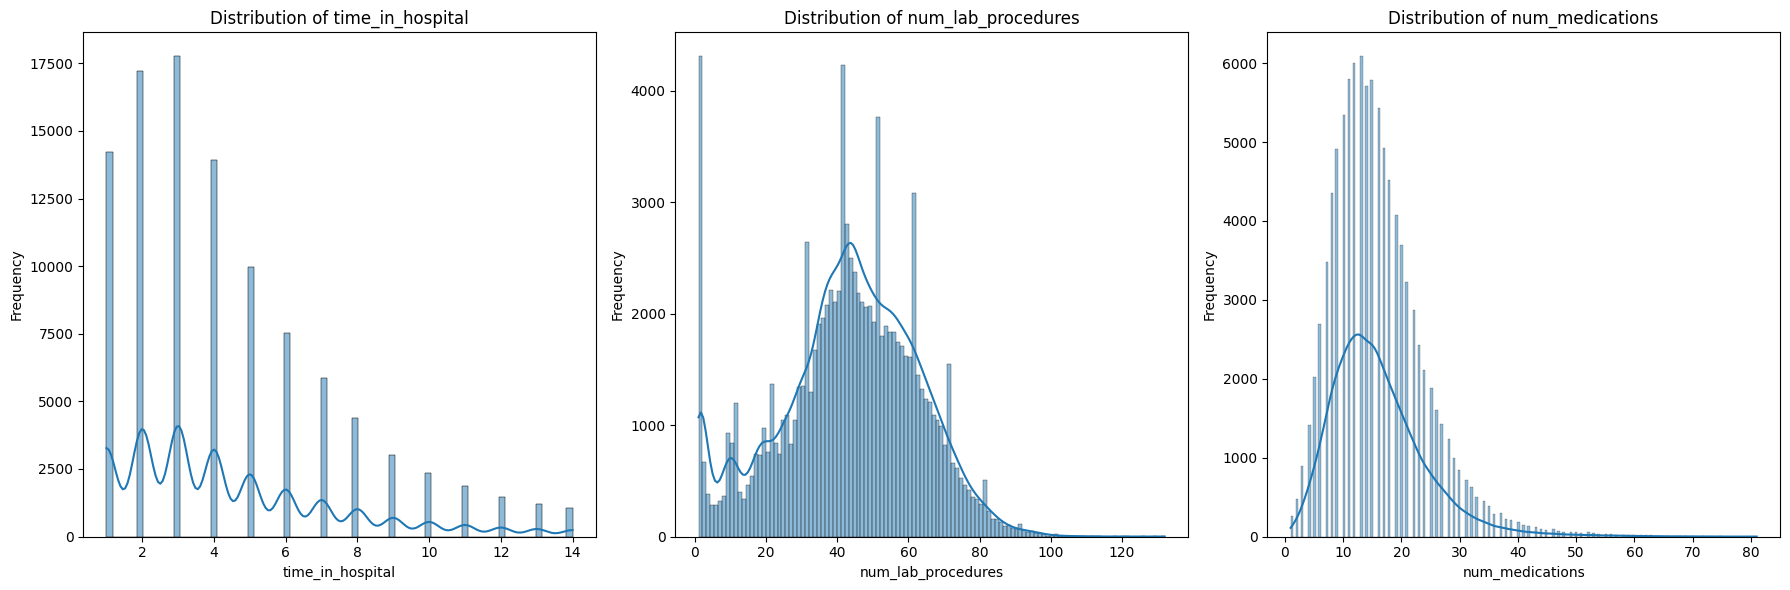

In [ ]:
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_medications']

plt.figure(figsize=(18, 6))

for i, feature in enumerate(numeric_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df1[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Visualize the distribution of lab results (max_glu_serum, A1Cresult) and their relation to readmission status.**

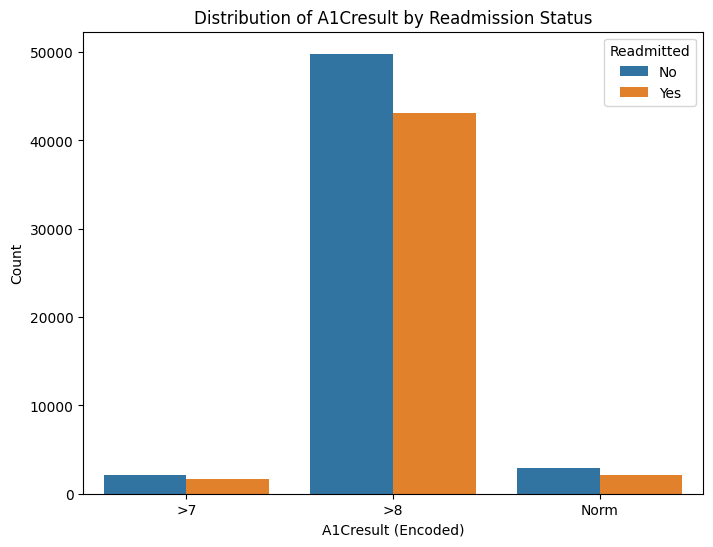

In [ ]:
# A1Cresult was encoded as 'A1Cresult_m' and the original 'max_glu_serum' column was dropped.
# We can visualize the distribution of 'A1Cresult_m' in relation to 'readmitted_binary'.

plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='A1Cresult_m', hue='readmitted_binary')
plt.title('Distribution of A1Cresult by Readmission Status')
plt.xlabel('A1Cresult (Encoded)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['>7', '>8', 'Norm']) # Map back to original labels if known
plt.legend(title='Readmitted', labels=['No', 'Yes'])
plt.show()

**Use correlation heatmaps to explore relationships between numeric features.**


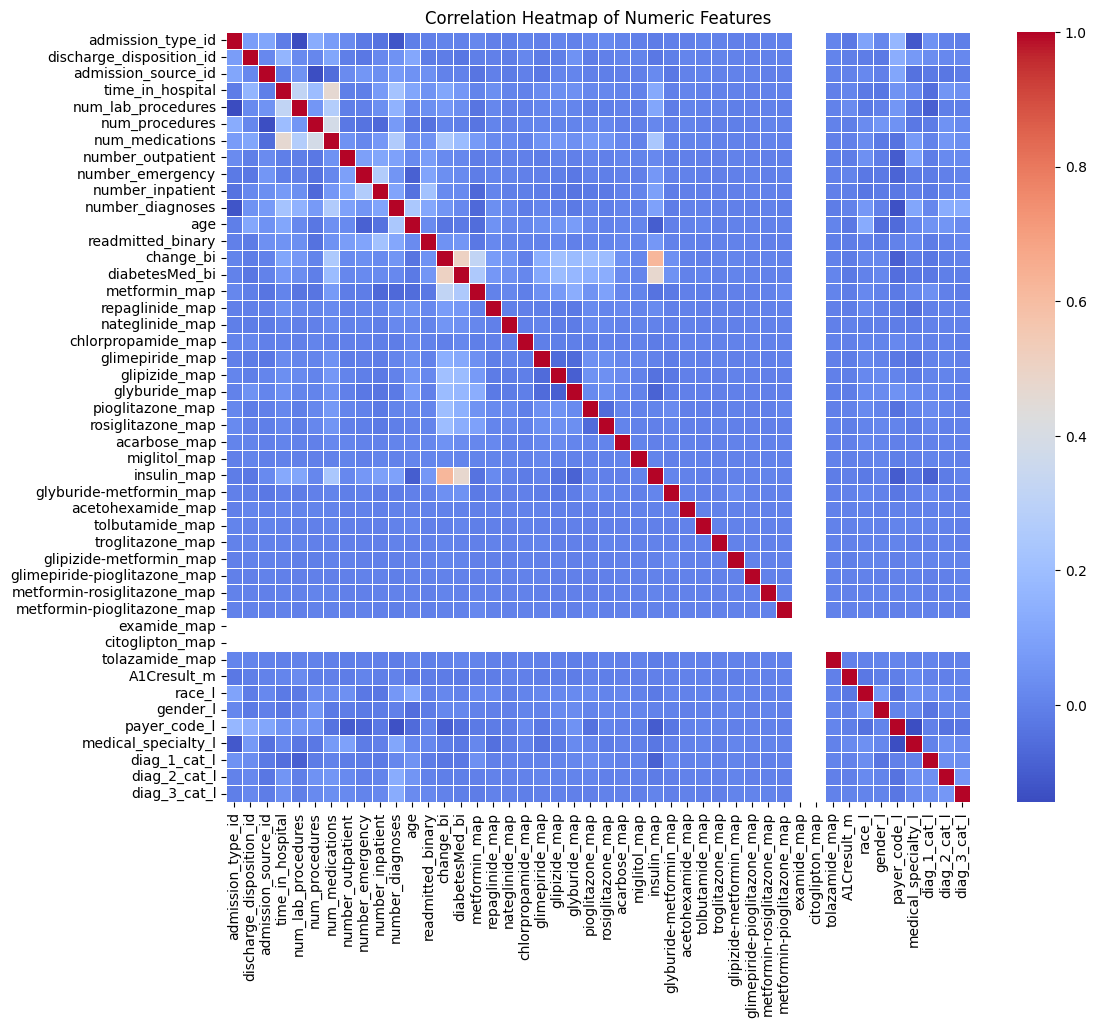

In [ ]:
numeric_df1 = df1.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df1.corr(), annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

**Plot admission types, discharge outcomes, and readmission frequencies**

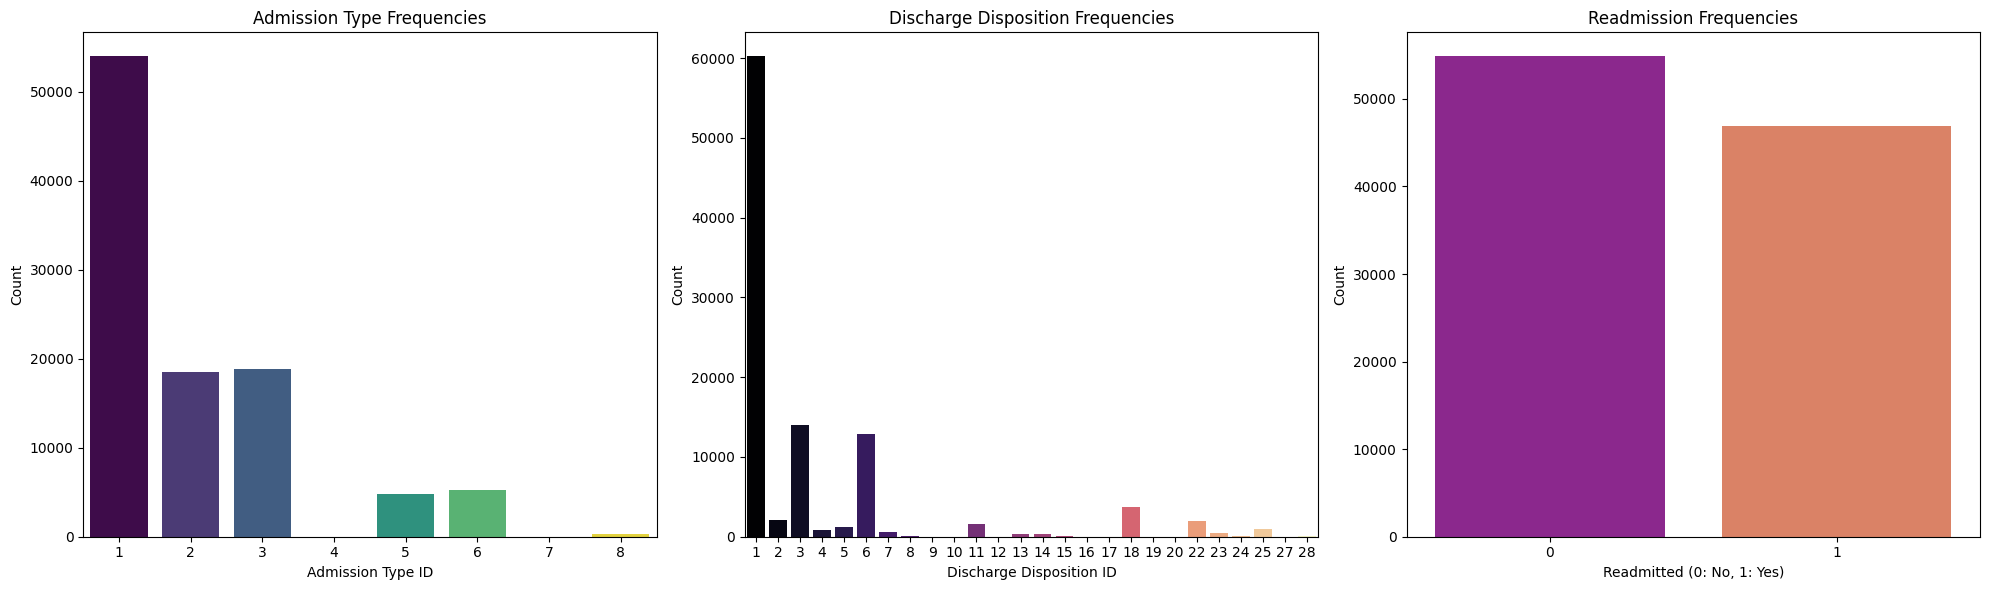

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=df1, x='admission_type_id', hue='admission_type_id', palette='viridis', legend=False)
plt.title('Admission Type Frequencies')
plt.xlabel('Admission Type ID')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.countplot(data=df1, x='discharge_disposition_id', hue='discharge_disposition_id', palette='magma', legend=False)
plt.title('Discharge Disposition Frequencies')
plt.xlabel('Discharge Disposition ID')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.countplot(data=df1, x='readmitted_binary', hue='readmitted_binary', palette='plasma', legend=False)
plt.title('Readmission Frequencies')
plt.xlabel('Readmitted (0: No, 1: Yes)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Compare medication use patterns across different patient subgroups**

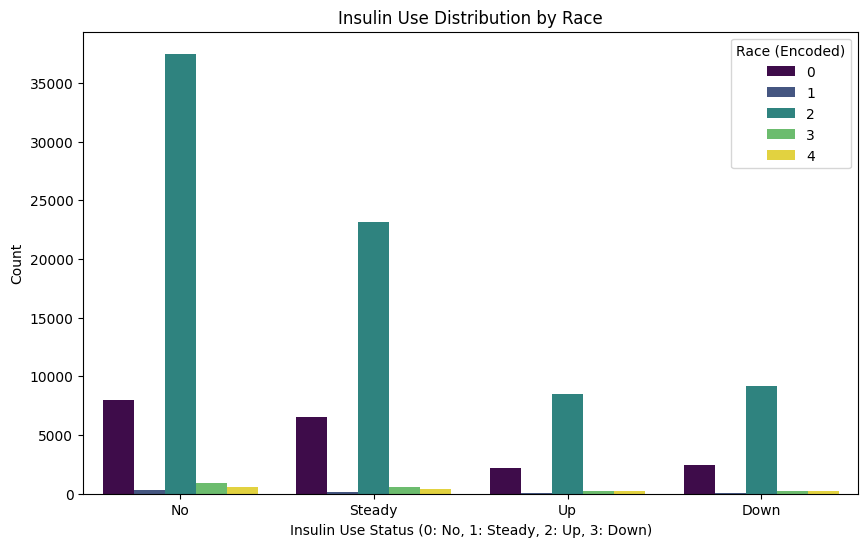

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='insulin_map', hue='race_l', palette='viridis')
plt.title('Insulin Use Distribution by Race')
plt.xlabel('Insulin Use Status (0: No, 1: Steady, 2: Up, 3: Down)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['No', 'Steady', 'Up', 'Down'])
plt.legend(title='Race (Encoded)')
plt.show()

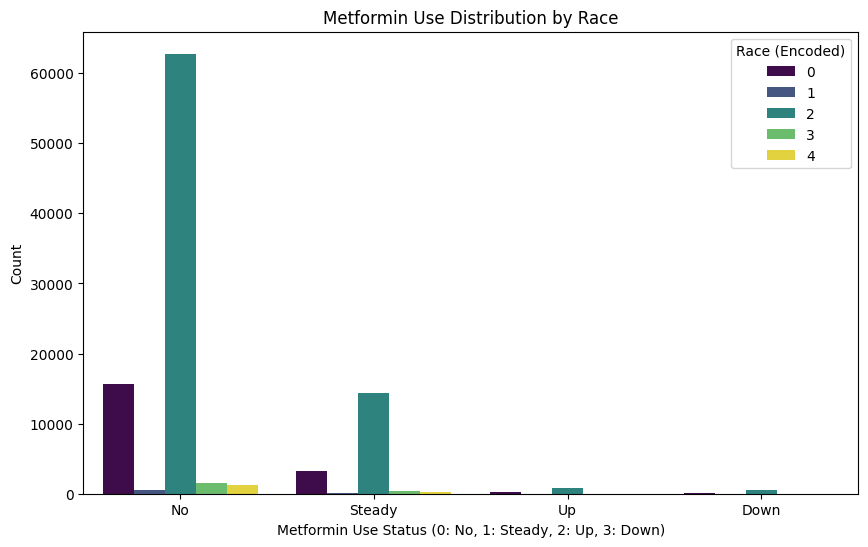

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='metformin_map', hue='race_l', palette='viridis')
plt.title('Metformin Use Distribution by Race')
plt.xlabel('Metformin Use Status (0: No, 1: Steady, 2: Up, 3: Down)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['No', 'Steady', 'Up', 'Down'])
plt.legend(title='Race (Encoded)')
plt.show()

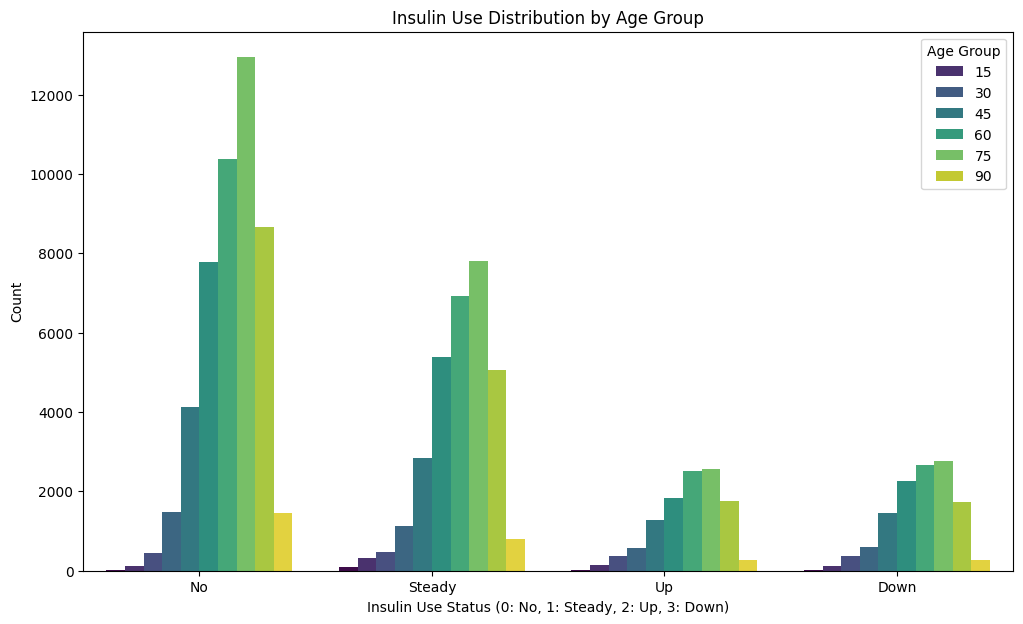

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df1, x='insulin_map', hue='age', palette='viridis')
plt.title('Insulin Use Distribution by Age Group')
plt.xlabel('Insulin Use Status (0: No, 1: Steady, 2: Up, 3: Down)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['No', 'Steady', 'Up', 'Down'])
plt.legend(title='Age Group')
plt.show()

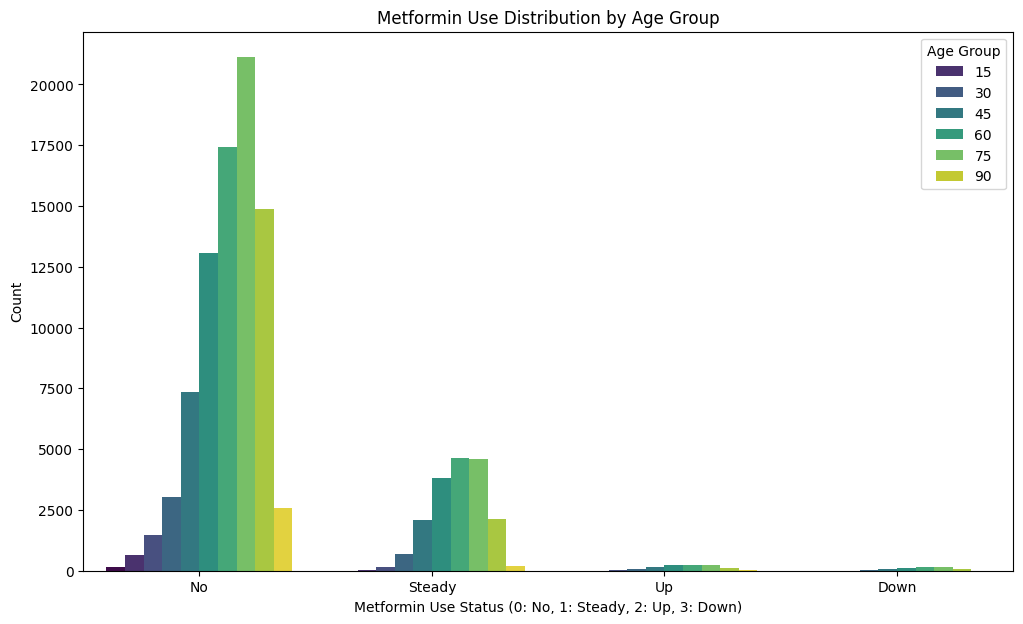

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df1, x='metformin_map', hue='age', palette='viridis')
plt.title('Metformin Use Distribution by Age Group')
plt.xlabel('Metformin Use Status (0: No, 1: Steady, 2: Up, 3: Down)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['No', 'Steady', 'Up', 'Down'])
plt.legend(title='Age Group')
plt.show()

# **MODEL Training**

In [ ]:
y=df1['readmitted_binary']
x=df1.drop(columns=['readmitted_binary','examide_map','citoglipton_map'],axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fit the model
rf = RandomForestClassifier()
rf.fit(x, y)

# Get feature importance
importances = rf.feature_importances_

fi = pd.DataFrame({"feature": x.columns, "importance": importances})
fi.sort_values("importance", ascending=True)

,feature,importance
33,metformin-pioglitazone_map,3.702748e-07
31,glimepiride-pioglitazone_map,2.494796e-06
27,acetohexamide_map,3.205952e-06
32,metformin-rosiglitazone_map,5.592452e-06
29,troglitazone_map,9.141113e-06
30,glipizide-metformin_map,3.094702e-05
28,tolbutamide_map,6.313233e-05
24,miglitol_map,8.868817e-05
34,tolazamide_map,1.172853e-04
17,chlorpropamide_map,2.893082e-04


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

lr=LogisticRegression(max_iter=2500)
lr.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=2500)

In [ ]:
y_pred=lr.predict(x_test_scaled)
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc}")
fscore=f1_score(y_test,y_pred)
print(f"F1 Score: {fscore}")
prec=precision_score(y_test,y_pred)
print(f"Precision: {prec}")
re=recall_score(y_test,y_pred)
print(f"Recall: {re}")
cm=confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix:\n {cm}")

Accuracy: 0.61634305479129
F1 Score: 0.49338246743135933
Precision: 0.6337333333333334
Recall: 0.40392623438429504
Confusion Matrix:
 [[10928  2747]
 [ 7014  4753]]


# **Logistic Regression with Gradient Decent**

In [ ]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(
    solver='saga',   # uses gradient descent
    max_iter=500
)

model2.fit(x_train ,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(max_iter=500, solver='saga')

In [ ]:
lr_pred2=model2.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, lr_pred2)}")
print(f"precision: {precision_score(y_test, lr_pred2)}")
print(f"recall: {recall_score(y_test, lr_pred2)}")
print(f"f1: {f1_score(y_test, lr_pred2)}")
print(f"confusion matrix:\n {confusion_matrix(y_test, lr_pred2)}")

Accuracy: 0.6185441396116658
precision: 0.6369917618921074
recall: 0.40741055494178635
f1: 0.4969678121598507
confusion matrix:
 [[10943  2732]
 [ 6973  4794]]


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
rf_pred = rf.predict(x_test_scaled)

rf_acc = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {rf_acc}")

rf_fscore = f1_score(y_test, rf_pred)
print(f"F1 Score: {rf_fscore}")

rf_prec = precision_score(y_test, rf_pred)
print(f"Precision: {rf_prec}")

rf_re = recall_score(y_test, rf_pred)
print(f"Recall: {rf_re}")

rf_cm = confusion_matrix(y_test, rf_pred)
print(f"Confusion Matrix:\n {rf_cm}")


Accuracy: 0.6433849540130493
F1 Score: 0.5830231168711797
Precision: 0.6348078462770216
Recall: 0.5390498852723719
Confusion Matrix:
 [[10026  3649]
 [ 5424  6343]]


# **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# gb=GradientBoostingClassifier()
gb = GradientBoostingClassifier(
    n_estimators=1750,        # number of trees
    learning_rate=0.05,     # how fast model learns
    max_depth=3             # depth of each tree
)

gb.fit(x_train_scaled, y_train)



GradientBoostingClassifier(learning_rate=0.05, n_estimators=1750)

In [ ]:
y_pred_gb = gb.predict(x_test_scaled)


acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {acc_gb}")

fscore_gb = f1_score(y_test, y_pred_gb)
print(f"F1 Score: {fscore_gb}")

prec_gb = precision_score(y_test, y_pred_gb)
print(f"Precision: {prec_gb}")

re_gb = recall_score(y_test, y_pred_gb)
print(f"Recall: {re_gb}")

cm_gb = confusion_matrix(y_test, y_pred_gb)
print(f"Confusion Matrix:\n {cm_gb}")




Accuracy: 0.651521106831224
F1 Score: 0.5968534012368134
Precision: 0.6418581907090465
Recall: 0.5577462394833007
Confusion Matrix:
 [[10013  3662]
 [ 5204  6563]]


## **AdaBoost with Decision Tree**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adc=AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=1000,
    learning_rate=0.05,
    random_state=42
    )
adc.fit(x_train_scaled,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.05, n_estimators=1000, random_state=42)

In [ ]:
adc1_pred=adc.predict(x_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, adc1_pred)}")
print(f"precision: {precision_score(y_test, adc1_pred)}")
print(f"recall: {recall_score(y_test, adc1_pred)}")
print(f"f1: {f1_score(y_test, adc1_pred)}")
print(f"confusion matrix:\n {confusion_matrix(y_test, adc1_pred)}")

Accuracy: 0.6238503262322145
precision: 0.6417236485614759
recall: 0.42270757202345544
f1: 0.5096833691976637
confusion matrix:
 [[10898  2777]
 [ 6793  4974]]


## **Adaboost with Random Forest**

In [ ]:
adc2=AdaBoostClassifier(
    estimator=RandomForestClassifier(max_depth=1),
    n_estimators=500,
    learning_rate=0.05,
    random_state=42
    )
adc2.fit(x_train_scaled,y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=1),
                   learning_rate=0.05, n_estimators=500, random_state=42)

In [ ]:
adc2_pred=adc2.predict(x_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, adc2_pred)}")
print(f"precision: {precision_score(y_test, adc2_pred)}")
print(f"recall: {recall_score(y_test, adc2_pred)}")
print(f"f1: {f1_score(y_test, adc2_pred)}")
print(f"confusion matrix:\n {confusion_matrix(y_test, adc2_pred)}")

Accuracy: 0.6387076487697508
precision: 0.6344928444583725
recall: 0.5161893430780997
f1: 0.5692596063730084
confusion matrix:
 [[10176  3499]
 [ 5693  6074]]


## **XGBoost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
xgb=XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

xgb.fit(x_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgb_pred=xgb.predict(x_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, xgb_pred)}")
print(f"precision: {precision_score(y_test, xgb_pred)}")
print(f"recall: {recall_score(y_test, xgb_pred)}")
print(f"f1: {f1_score(y_test, xgb_pred)}")
print(f"confusion matrix:\n {confusion_matrix(y_test, xgb_pred)}")

Accuracy: 0.6508922254539737
precision: 0.6445825398416357
recall: 0.5465284269567434
f1: 0.5915194996320824
confusion matrix:
 [[10129  3546]
 [ 5336  6431]]


## **CatBoost Final**

In [ ]:
# pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# 1. Identify which columns are categorical
# Based on your file, these are the ones ending in _id, _map, or _l
cat_features_indices2 = [
    'change_bi', 'diabetesMed_bi', 'metformin_map',
       'repaglinide_map', 'nateglinide_map', 'chlorpropamide_map',
       'glimepiride_map', 'glipizide_map', 'glyburide_map', 'pioglitazone_map',
       'rosiglitazone_map', 'acarbose_map', 'miglitol_map', 'insulin_map',
       'glyburide-metformin_map', 'acetohexamide_map', 'tolbutamide_map',
       'troglitazone_map', 'glipizide-metformin_map',
       'glimepiride-pioglitazone_map', 'metformin-rosiglitazone_map',
       'metformin-pioglitazone_map',  'A1Cresult_m', 'tolazamide_map', 'race_l',
       'gender_l', 'payer_code_l', 'medical_specialty_l', 'diag_1_cat_l',
       'diag_2_cat_l', 'diag_3_cat_l']

# 2. Initialize the model
model1 = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    verbose=100,  # Log every 100 trees,
    class_weights=[0.92743876, 1.08487911]
)

# 3. Train (Notice we pass the 'cat_features' argument!)
model1.fit(
    x_train, y_train,
    cat_features=cat_features_indices2,  # <--- THIS IS THE SECRET SAUCE
    eval_set=(x_test, y_test),
    early_stopping_rounds=50
)



0:	learn: 0.6885520	test: 0.6886574	best: 0.6886574 (0)	total: 549ms	remaining: 9m 8s
100:	learn: 0.6279007	test: 0.6303328	best: 0.6303328 (100)	total: 45.4s	remaining: 6m 44s
200:	learn: 0.6198775	test: 0.6250240	best: 0.6250240 (200)	total: 1m 29s	remaining: 5m 54s
300:	learn: 0.6133619	test: 0.6218640	best: 0.6218640 (300)	total: 2m 15s	remaining: 5m 13s
400:	learn: 0.6091940	test: 0.6203633	best: 0.6203633 (400)	total: 2m 59s	remaining: 4m 28s
500:	learn: 0.6059101	test: 0.6197501	best: 0.6197444 (498)	total: 3m 43s	remaining: 3m 42s
600:	learn: 0.6032837	test: 0.6192557	best: 0.6192488 (592)	total: 4m 27s	remaining: 2m 57s
700:	learn: 0.6009482	test: 0.6189882	best: 0.6189831 (698)	total: 5m 12s	remaining: 2m 13s
800:	learn: 0.5986878	test: 0.6186734	best: 0.6186734 (800)	total: 5m 56s	remaining: 1m 28s
900:	learn: 0.5965871	test: 0.6183906	best: 0.6183598 (885)	total: 6m 40s	remaining: 44s
999:	learn: 0.5947948	test: 0.6181917	best: 0.6181824 (998)	total: 7m 44s	remaining: 0us



In [ ]:
# 4. Evaluate
preds1 = model1.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, preds1)}")
print(f"precision: {precision_score(y_test, preds1)}")
print(f"recall: {recall_score(y_test, preds1)}")
print(f"f1: {f1_score(y_test, preds1)}")
print(f"confusion matrix: \n{confusion_matrix(y_test, preds1)}")

Accuracy: 0.6488090558918324
precision: 0.6141015310233683
recall: 0.6476587065522224
f1: 0.6304338834429416
confusion matrix: 
[[8886 4789]
 [4146 7621]]


## Model Comparison Table

Below is a summary of the performance metrics for each model, sorted by F1-Score. The F1-Score provides a balance between precision and recall, making it a good metric for overall model performance, especially in cases of imbalanced classes.

In [ ]:
results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Logistic Regression (Gradient Descent)',
        'Random Forest',
        'Gradient Boosting',
        'AdaBoost with Decision Tree',
        'AdaBoost with Random Forest',
        'XGBoost',
        'CatBoost (Initial)',
        'CatBoost (Final)'
    ],
    'Accuracy': [
        acc,
        accuracy_score(y_test, lr_pred2),
        rf_acc,
        acc_gb,
        accuracy_score(y_test, adc1_pred),
        accuracy_score(y_test, adc2_pred),
        accuracy_score(y_test, xgb_pred),
        accuracy_score(yc_test, preds), # This is the initial CatBoost model
        accuracy_score(y_test, preds1)  # This is the final CatBoost model
    ],
    'Precision': [
        prec,
        precision_score(y_test, lr_pred2),
        rf_prec,
        prec_gb,
        precision_score(y_test, adc1_pred),
        precision_score(y_test, adc2_pred),
        precision_score(y_test, xgb_pred),
        precision_score(yc_test, preds),
        precision_score(y_test, preds1)
    ],
    'Recall': [
        re,
        recall_score(y_test, lr_pred2),
        rf_re,
        re_gb,
        recall_score(y_test, adc1_pred),
        recall_score(y_test, adc2_pred),
        recall_score(y_test, xgb_pred),
        recall_score(yc_test, preds),
        recall_score(y_test, preds1)
    ],
    'F1-Score': [
        fscore,
        f1_score(y_test, lr_pred2),
        rf_fscore,
        fscore_gb,
        f1_score(y_test, adc1_pred),
        f1_score(y_test, adc2_pred),
        f1_score(y_test, xgb_pred),
        f1_score(yc_test, preds),
        f1_score(y_test, preds1)
    ]
})

results_sorted = results.sort_values(by='F1-Score', ascending=False)
display(results_sorted)

,Model,Accuracy,Precision,Recall,F1-Score
7,CatBoost (Initial),0.653604,0.618198,0.656497,0.636772
8,CatBoost (Final),0.648809,0.614102,0.647659,0.630434
3,Gradient Boosting,0.651521,0.641858,0.557746,0.596853
6,XGBoost,0.650892,0.644583,0.546528,0.591519
2,Random Forest,0.643385,0.634808,0.539050,0.583023
5,AdaBoost with Random Forest,0.638708,0.634493,0.516189,0.569260
4,AdaBoost with Decision Tree,0.623850,0.641724,0.422708,0.509683
1,Logistic Regression (Gradient Descent),0.618544,0.636992,0.407411,0.496968
0,Logistic Regression,0.616343,0.633733,0.403926,0.493382


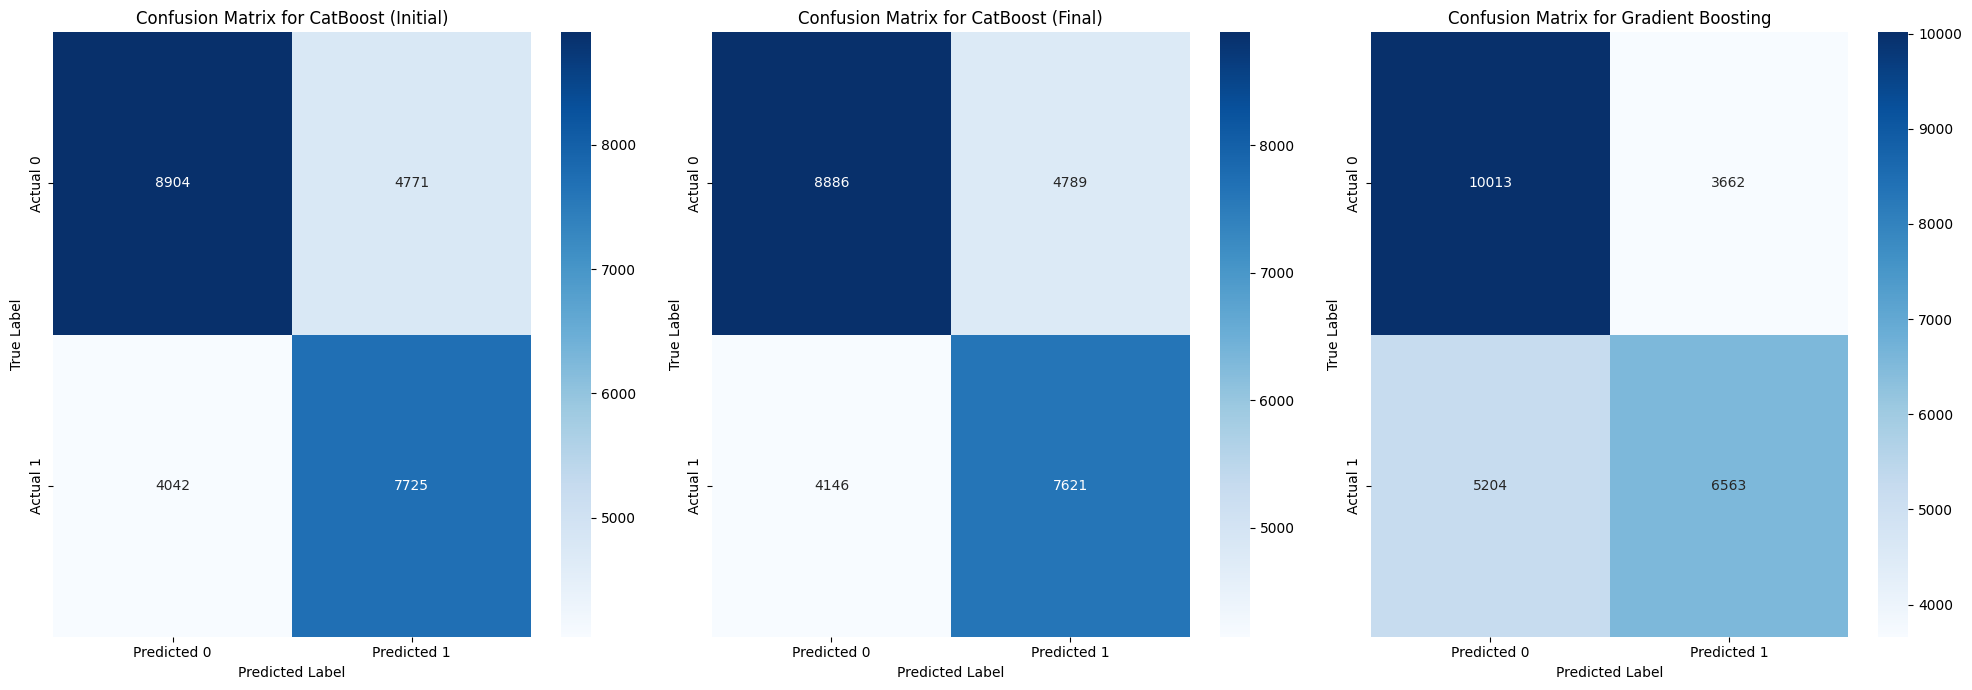

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

top_3_model_names = results_sorted.head(3)['Model'].tolist()

confusion_matrices_top3 = {
    name: confusion_matrices[name] for name in top_3_model_names
}

plt.figure(figsize=(20, 7))
for i, (model_name, cm_data) in enumerate(confusion_matrices_top3.items()):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm_data, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()

## Adding Your Colab Notebook to a New GitHub Repository

There are two main ways to do this:

### Method 1: Using Colab's Built-in Integration (Recommended for New Repos)

This is the simplest way if you're creating a new repository specifically for this notebook.

1.  **Go to File > Save a copy in GitHub** in the Colab menu.
2.  A dialog box will appear. You might be prompted to **authorize Colab to access your GitHub account** if you haven't already.
3.  Select your **GitHub account**.
4.  Choose to create a **'New repository'**.
5.  Give your repository a **name** (e.g., `my-project-notebooks`) and an optional description.
6.  Select whether it should be **public or private**.
7.  Click **'OK'**.

Colab will create the new repository on GitHub and save your current notebook to it.

### Method 2: Manual Git Operations (More Control, Requires Local Setup or Advanced Colab Usage)

This method is more involved but gives you full control over your Git repository. It's typically done by downloading the notebook and then using Git commands locally.

1.  **Create a New Repository on GitHub.com**:
    *   Go to [GitHub](https://github.com/) and log in.
    *   Click the `+` sign in the top right corner and select **'New repository'**.
    *   Give your repository a name (e.g., `my-colab-notebook`) and an optional description.
    *   Choose whether it's public or private.
    *   **Do NOT initialize the repository with a README, .gitignore, or license** (unless you plan to pull these down later). Just click **'Create repository'**.

2.  **Save Your Notebook Locally**:
    *   In Colab, go to **File > Download > Download .ipynb**.
    *   Save the `.ipynb` file to a folder on your computer (e.g., `my_github_repo`).

3.  **Initialize a Local Git Repository**:
    *   Open your terminal or command prompt.
    *   Navigate to the folder where you saved your notebook:
        ```bash
        cd /path/to/my_github_repo
        ```
    *   Initialize a new Git repository:
        ```bash
        git init
        ```

4.  **Add Your Notebook to the Repository**:
    *   Add your notebook file to the staging area:
        ```bash
        git add YourNotebookName.ipynb
        ```
    *   Commit your changes:
        ```bash
        git commit -m "Initial commit: Add Colab notebook"
        ```

5.  **Connect Your Local Repository to GitHub**:
    *   On your new GitHub repository page, you'll see a section with

Quick Setup

 instructions. Copy the remote URL (usually `https://github.com/YOUR_USERNAME/YOUR_REPO_NAME.git`).
    *   In your terminal, add the remote origin:
        ```bash
        git remote add origin https://github.com/YOUR_USERNAME/YOUR_REPO_NAME.git
        ```
        (Replace the URL with your actual repository URL).

6.  **Push Your Notebook to GitHub**:
    *   Push your local commits to the `main` (or `master`) branch on GitHub:
        ```bash
        git branch -M main
        git push -u origin main
        ```
    *   You may be prompted for your GitHub username and password/Personal Access Token.

Your notebook will now be visible in your new GitHub repository!